Template for different way of handling missing data. Codes explanation are at https://youranalystbuddy.com/handle-missing-data/

## Loading data and check missing count

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('students-missing.csv')
data = data.drop('StudentID', axis=1)

In [2]:
#get missing information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FirstName          1000 non-null   object 
 1   LastName           1000 non-null   object 
 2   Major              1000 non-null   object 
 3   HighSchoolGPA      974 non-null    float64
 4   FamilyIncome       960 non-null    float64
 5   State              982 non-null    object 
 6   AvgDailyStudyTime  937 non-null    float64
 7   TotalAbsence       820 non-null    float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


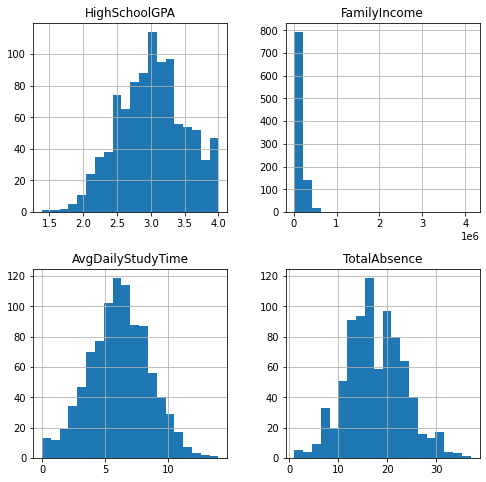

In [4]:
#draw histograms
data.hist(bins=20, figsize=(8,8))
plt.show()

## Dropping rows with missing values

In [5]:
data_drp_na = data.dropna(axis=0)
data_drp_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FirstName          701 non-null    object 
 1   LastName           701 non-null    object 
 2   Major              701 non-null    object 
 3   HighSchoolGPA      701 non-null    float64
 4   FamilyIncome       701 non-null    float64
 5   State              701 non-null    object 
 6   AvgDailyStudyTime  701 non-null    float64
 7   TotalAbsence       701 non-null    float64
dtypes: float64(4), object(4)
memory usage: 49.3+ KB


## Imputation

### Impute with constants

#### Median for numeric columns

In [6]:
num_cols = ['HighSchoolGPA','FamilyIncome','AvgDailyStudyTime','TotalAbsence']

In [7]:
data_imp_num = data.copy()
data_imp_num[num_cols] = data_imp_num[num_cols].fillna(data_imp_num[num_cols].median())

In [8]:
data_imp_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FirstName          1000 non-null   object 
 1   LastName           1000 non-null   object 
 2   Major              1000 non-null   object 
 3   HighSchoolGPA      1000 non-null   float64
 4   FamilyIncome       1000 non-null   float64
 5   State              982 non-null    object 
 6   AvgDailyStudyTime  1000 non-null   float64
 7   TotalAbsence       1000 non-null   float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


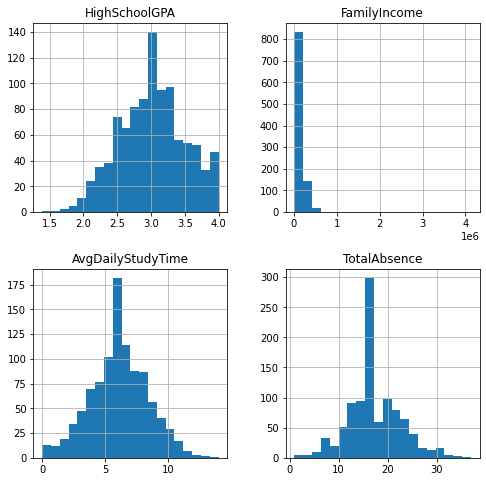

In [9]:
data_imp_num.hist(bins=20, figsize=(8,8))
plt.show()

### Missing categories for categorical columns

In [10]:
cat_cols = ['Major','State']

In [11]:
data_imp_cat = data.copy()
data_imp_cat[cat_cols] = data_imp_cat[cat_cols].fillna('missing')

In [12]:
data_imp_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FirstName          1000 non-null   object 
 1   LastName           1000 non-null   object 
 2   Major              1000 non-null   object 
 3   HighSchoolGPA      974 non-null    float64
 4   FamilyIncome       960 non-null    float64
 5   State              1000 non-null   object 
 6   AvgDailyStudyTime  937 non-null    float64
 7   TotalAbsence       820 non-null    float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


In [13]:
for col in cat_cols:
    print(col)
    print(data_imp_cat[col].value_counts())
    print('---')

Major
Information Technology    281
Computer Science          259
Software Engineering      249
Data Science              211
Name: Major, dtype: int64
---
State
GA         544
SC         137
FL         117
AL         102
TN          74
missing     18
WA           5
NY           3
Name: State, dtype: int64
---


### Regression imputation

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10)
data_imp_num = imputer.fit_transform(data[num_cols])

In [15]:
pd.DataFrame(data_imp_num).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


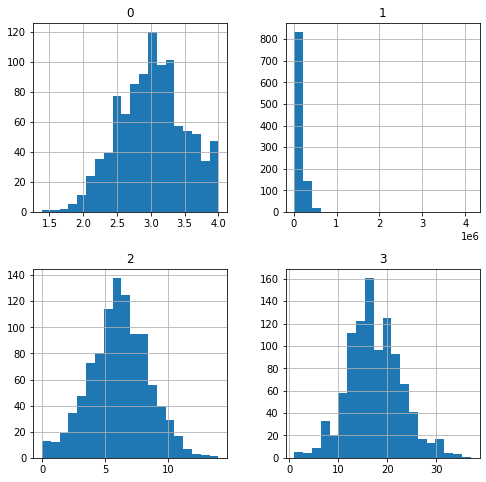

In [17]:
pd.DataFrame(data_imp_num).hist(bins=20, figsize=(8,8))
plt.show()

### Nearest neighbor imputation

In [18]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
data_imp_num = imputer.fit_transform(data[num_cols])

In [19]:
pd.DataFrame(data_imp_num).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


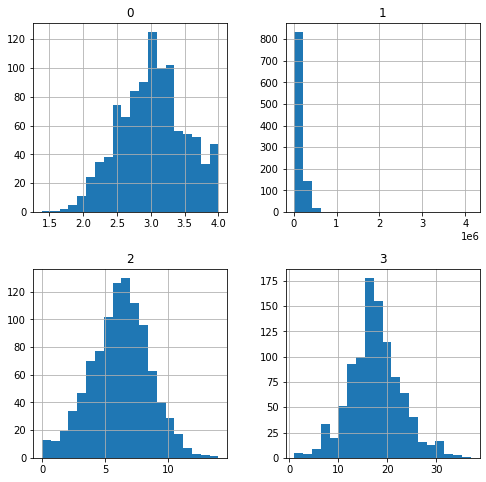

In [20]:
pd.DataFrame(data_imp_num).hist(bins=20, figsize=(8,8))
plt.show()